Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [10]:
%matplotlib inline

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

### Imports and filter data for NaN's

In [11]:
import thinkstats2
import thinkplot
import brfss
import seaborn
import math
import numpy
import numpy as np
import pandas as pd
df = brfss.ReadBrfss()
df = df.dropna()
weight = [float(x) for x in df.finalwt]
weight_log = [math.log(x) for x in weight]

df['logweight'] = weight_log





### Function Definitions

In [12]:
#Covariance

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov


#Pearson's Correlation
def Corr(xs, ys):
    #xs_filtered = xs[(~xs.isnull()) & (~ys.isnull())]
    #ys_filtered = ys[(~xs.isnull()) & (~ys.isnull())]
    
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    meanx, varx = np.mean(xs), np.var(xs)
    meany, vary = np.mean(ys), np.var(ys)
    
    #use covariance  function to find Pearson's Correlation
    corr = Cov(xs, ys, meanx, meany) / math.sqrt(varx * vary)
    return corr
 

def LeastSquares(xs, ys):
    meanx, varx = np.mean(xs), np.var(xs)
    meany = np.mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

def Residuals(xs, ys, inter, slope):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    res = ys - (inter + slope * xs)
    return res

def SamplingDistributions(live, iters=101):
    t = []
    for _ in range(iters):
        sample = thinkstats2.ResampleRows(live)
        weight_log = sample.logweight
        height = sample.htm3
        estimates = thinkstats2.LeastSquares(weight_log, height)
        t.append(estimates)

    inters, slopes = zip(*t)
    return inters, slopes

def PlotConfidenceIntervals(xs, inters, slopes,
                            percent=90, **options):
    fys_seq = []
    for inter, slope in zip(inters, slopes):
        fxs, fys = FitLine(xs, inter, slope)
        fys_seq.append(fys)

    p = (100 - percent) / 2
    percents = p, 100 - p
    low, high = thinkstats2.PercentileRows(fys_seq, percents)
    thinkplot.FillBetween(fxs, low, high, **options)
    thinkplot.Show()



In [13]:
weight = [float(x) for x in df.finalwt]
weight_log = [math.log(x) for x in weight]

df['logweight'] = weight_log

height = df.htm3

inter, slope = LeastSquares(weight_log, height)
fit_weight, fit_height = FitLine(weight_log, inter, slope)

print "fit_weight =" + str(fit_weight)
print "fit_height =" + str(fit_height)

print "inter =" + str(inter)
print "slope =" + str(slope)

fit_weight =[  0.52776687   0.66247647   0.71614406 ...,  10.67297325  10.77210391
  11.018549  ]
fit_height =[ 164.37951627  164.50526622  164.55536432 ...,  173.84995567  173.94249305
  174.17254686]
inter =163.886851663
slope =0.933489081783


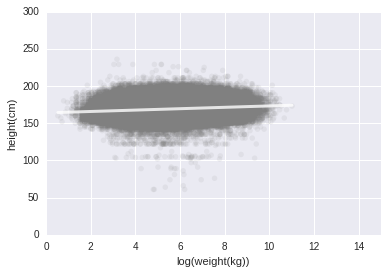

In [14]:
thinkplot.Scatter(df.logweight, df.htm3, color='gray', alpha=0.1)
thinkplot.Plot(fit_weight, fit_height, color='white', linewidth=3)
thinkplot.Plot(fit_height, fit_weight, color='blue', linewidth=2)
thinkplot.Show(root='linear1',
                xlabel='log(weight(kg))',
                ylabel='height(cm)',
                axis=[0, 15, 0, 300],
                legend=False)


In [15]:
resids = Residuals(weight_log, height, inter, slope)
print resids

[-11.76437819  -5.40592497   0.27899756 ...,  11.28827673  -9.1410916
  11.07211737]


### Plot Residuals

Unsure why graph is not showing any data.

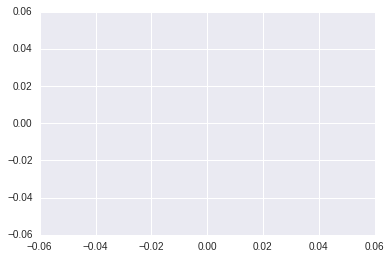

In [16]:
df['residual'] = resids

bins = np.arange(10, 250, 3)
indices = np.digitize(weight_log, bins)
groups = df.groupby(indices)

#weight_logs = [weight_log.mean() for _, group in groups][1:-1]
#weight_logs = [mean(x) for x in weight_logs]
weight_logs = [group.logweight.mean() for _, group in groups][1:-1]
cdfs = [thinkstats2.Cdf(group.residual) for _, group in groups][1:-1]

thinkplot.PrePlot(3)
for percent in [75, 50, 25]:
    height = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(weight_logs, height, label=label)

#thinkplot.Show(xlabel='weight kg',ylabel='residual (cms)', xlim=[10, 400])
thinkplot.Show()


### Sampling Distribution

In [17]:
(inters, slopes) = SamplingDistributions(df, iters=101)


### 90% Confidence Interval

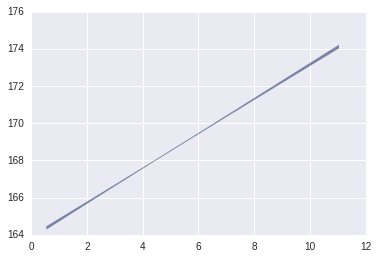

In [18]:
PlotConfidenceIntervals(weight_log, inters, slopes, percent=90)

Independent variable is log transformed
A linear regression model with one log-transformed predictor variable can be expressed with the
following equation:

Y = B0+B1*ln(X1)+B2X2

Source: https://www.cscu.cornell.edu/news/statnews/stnews83.pdf




## Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

I am still confused about how to properly interpret the graphs I generate. I do not fully understand how to get and interpret meaningful information from a graph when I know one of the variables is log-transformed.  My 90% confidence interval seems very small to me in the graph - is this because of the log()? Or is it incorrect?
Thanks

## Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

## Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.